# README
### Żeby wszystko dzialalo to dane musza byc w data_csv/, a obrazki pojawiaja sie w plots/
## OBYDWA FOLDERY MUSZA ISTNIEC ZEBY PROGRAM DZIALAL POPRAWNIE

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd

def read_x_y(name):
    files_location = r'data_csv/'
    df = pd.read_csv(files_location+name,  delimiter=",")

    x, y = df.iloc[0].to_numpy().astype(float),df.iloc[1].to_numpy().astype(float)
    return x, y
# Define the Gaussian function
def Gauss(x, N, mean, sigma):
    y = N*np.exp(-.5*((x - mean)/sigma)**2)
    return y
def curve_fitter(xdata, ydata, p0 = (1.,1.,1.), plt_name = None):

    


    parameters, covariance = curve_fit(Gauss, xdata, ydata, p0 = p0)
    
    print('N\tmean\tsigma')
    print(parameters)
    N_fit = parameters[0]
    mean_fit = parameters[1]
    sigma_fit = parameters[2]
    
    fit_y = Gauss(xdata, N_fit, mean_fit, sigma_fit)
    
    plt.figure(figsize=(8, 6), dpi=80)
    plt.xlabel('k')
    plt.ylabel('N')
    plt.plot(xdata, ydata, 'o', label='data', color = 'green', markersize=3)
    plt.plot(xdata, fit_y, '-', label='fit', color = 'red')
    
    
    # text lines
    N_max = r'N_{max}'
    
    
    plt.text(x = plt.xlim()[1]*.83, y = plt.ylim()[1]*.9,s = f'$\mu = {parameters[1]:.4f}$\n${N_max}={parameters[1]:.2f}$', bbox=dict(fc="none"), ha='center')
    
    
    
    
    if (plt_name != None):
        plt.title(plt_name, fontsize = 15)
        save_fig_files_location = r'plots/'
        plt.savefig(save_fig_files_location + plt_name, bbox_inches='tight')
    plt.show()

N	mean	sigma
[26.78094465 36.12163769 16.89155682]


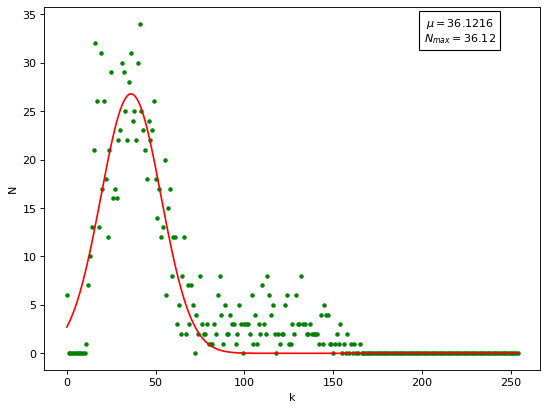

In [6]:
filename = 'zespol_najlepszy_Sn.csv'

x, y = read_x_y(filename)


curve_fitter(x, y, p0 = (250, 40, 1))